In [177]:
import pandas as pd
import numpy as np
import re
import metplotlib.pyplot as plt

data = pd.read_csv('personnes.csv')
print(data)

ModuleNotFoundError: No module named 'metplotlib'

In [92]:
print(data.isnull().sum())

prenom            0
email             0
date_naissance    1
pays              1
taille            0
dtype: int64


In [93]:
data.loc[data['email'].duplicated(keep=False),:]

,prenom,email,date_naissance,pays,taille
1,Samuel,samuel_329@example.com,20/09/2001,NaN,1.67m
6,samuël,samuel_329@example.com,NaN,Bénin,1.45m


In [94]:
data['email'][0]

'leila@example.com'

In [95]:
data['taille'] = data['taille'].str[:-1]

In [96]:
data['taille'] = pd.to_numeric(data['taille'],errors='coerce')

In [98]:
print(data)

   prenom                                   email date_naissance  \
0   Leila                       leila@example.com     23/01/1990   
1  Samuel                  samuel_329@example.com     20/09/2001   
2   Radia                choupipoune@supermail.eu  12 sept. 1984   
3    Marc  marco23@example.com, mc23@supermail.eu     10/02/1978   
4    Heri                 helloworld@supermail.eu     05/03/2008   
5   Hanna                  hanna2019@supermail.eu     01/01/1970   
6  samuël                  samuel_329@example.com            NaN   

            pays  taille  
0         France    1.49  
1            NaN    1.67  
2  Côte d'ivoire     NaN  
3         France    1.65  
4     Madagascar    1.34  
5             24    3.45  
6          Bénin    1.45  


In [99]:
data.loc[data['taille'].isnull(),'taille']=data['taille'].mean()

In [100]:
data['email']=data['email'].str.split(',', n=1, expand = True)[0]

In [102]:
data['date_naissance'] = pd.to_datetime(data['date_naissance'], format = '%d/%m/%Y', errors = 'coerce')

In [111]:
op = pd.read_csv('operations.csv')

In [112]:
print(op)

    date_operation                                       libelle  montant  \
0       2023-03-31                      DON XX XX XX XX XX XX XX    -1.44   
1       2023-04-03                           CARTE XX XX RAPT XX   -24.00   
2       2023-04-03                           CARTE XX XX RAPT XX   -73.00   
3       2023-04-03  VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX   676.00   
4       2023-04-03                    VIREMENT XX XX XX XX XX XX     4.80   
..             ...                                           ...      ...   
304     2023-10-05                       CARTE XX XX XX XX XX XX   -10.64   
305     2023-10-05                             CARTE XX XX XX XX    -4.80   
306     2023-10-06          FORFAIT COMPTE SUPERBANK XX XX XX XX    -1.92   
307     2023-10-06                       CARTE XX XX CHEZ LUC XX   -10.00   
308     2023-10-06                PRELEVEMENT XX TELEPHONE XX XX   -13.58   

     solde_avt_ope                categ  
0          1515.25               

In [113]:
op.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

In [116]:
op['date_operation']=pd.to_datetime(op['date_operation'])

In [118]:
op_na = op.loc[op['montant'].isnull(),:]
for index in op_na.index:
    op.loc[index,'montant'] = op.loc[index+1, 'solde_avt_ope'] - op.loc[index, 'solde_avt_ope']

In [120]:
op.loc[op['categ'].isnull(),:]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


In [122]:
op.loc[op['libelle'] == 'PRELEVEMENT XX TELEPHONE XX XX', :]

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


In [123]:
op.loc[op['categ'].isnull(),['categ']]= 'FACTURE TELEPHONE'

In [124]:
op.loc[op[['date_operation','libelle', 'montant', 'solde_avt_ope']].duplicated(keep = False),:]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [126]:
op.drop_duplicates(subset=['date_operation','libelle', 'montant', 'solde_avt_ope'], inplace=True, ignore_index=True)

In [127]:
op.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,-45.782013,3395.301071
std,872.818105,667.109412
min,-15000.000000,1416.810000
25%,-20.447500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


In [129]:
i = op.loc[op['montant']==-15000,:].index[0]
op.iloc[i-1:i+2,:]

,date_operation,libelle,montant,solde_avt_ope,categ
197,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
198,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
199,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [130]:
op.loc[op['montant']==-15000,'montant']= -14.39

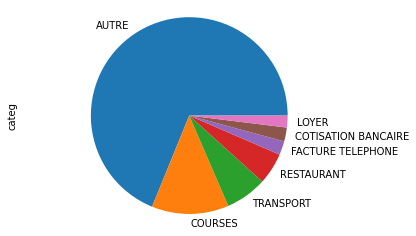

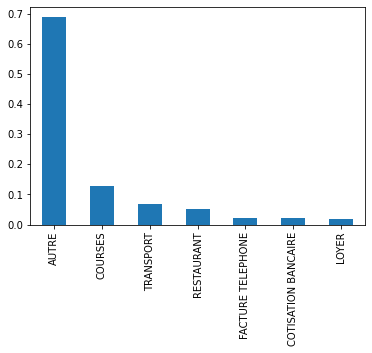

In [136]:
import matplotlib.pyplot as plt

# Diagramme en secteurs
op['categ'].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
op['categ'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [137]:
op['quart_mois'] = [int((jour-1)*4/31)+1 for jour in op["date_operation"].dt.day]

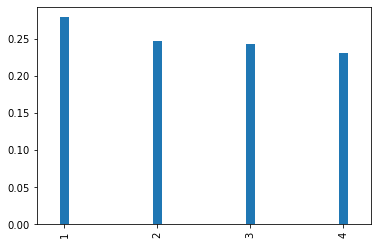

In [138]:
# Diagramme en bâtons
op["quart_mois"].value_counts(normalize=True).plot(kind='bar',width=0.1)
plt.show()

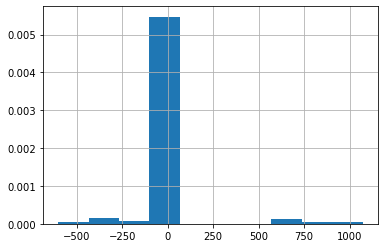

In [139]:
op['montant'].hist(density=True)
plt.show()

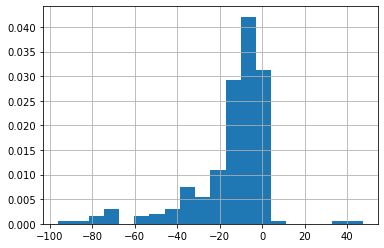

In [141]:
op[op.montant.abs()<100]['montant'].hist(density=True, bins=20)
plt.show()

In [152]:
effectifs = op["quart_mois"].value_counts()
modalites = effectifs.index
tab = pd.DataFrame(modalites, columns = ["quart_mois"])

tab["n"] = effectifs.values
tab['f'] = tab["n"]/len(op)
tab = tab.sort_values("quart_mois")
tab["F"] = tab['f'].cumsum()
tab.head()

,quart_mois,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


In [155]:
op['montant'].median()

-9.6

In [163]:
op['montant'].var()

31007.638040630973

In [164]:
op['montant'].var(ddof=0)

30906.963891148403

In [165]:
op['montant'].std()

176.08985785851203

In [167]:
op['montant'].std()/op['montant'].mean()

61.30056651079017

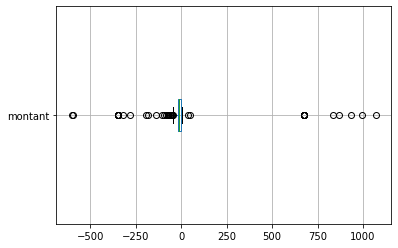

In [168]:
op.boxplot(column = 'montant', vert =False)
plt.show()

In [169]:
op['montant'].skew()

3.3618450105098843

In [176]:
depenses = op[op['montant']<0]
dep = -depenses['montant'].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep))/dep.sum()
print(lorenz) 

[9.25023386e-05 1.85004677e-04 2.77507016e-04 3.70009354e-04
 4.62511693e-04 5.71201941e-04 6.82204747e-04 7.93207553e-04
 9.04210360e-04 1.02908852e-03 1.15859179e-03 1.28809506e-03
 1.42569229e-03 1.56444580e-03 1.72632489e-03 1.89282910e-03
 2.05933331e-03 2.22583752e-03 2.39234173e-03 2.55884594e-03
 2.72535015e-03 2.90226087e-03 3.08726555e-03 3.27227023e-03
 3.45727490e-03 3.64227958e-03 3.82728426e-03 4.01228894e-03
 4.19729361e-03 4.38229829e-03 4.57655320e-03 4.77312067e-03
 4.97662582e-03 5.18013096e-03 5.39288634e-03 5.60564172e-03
 5.81839710e-03 6.03809015e-03 6.26009576e-03 6.48210138e-03
 6.70410699e-03 6.92611260e-03 7.15736845e-03 7.38862429e-03
 7.61988014e-03 7.85229227e-03 8.11592393e-03 8.38418071e-03
 8.66168773e-03 8.93919474e-03 9.21670176e-03 9.49420878e-03
 9.77171579e-03 1.00492228e-02 1.03313549e-02 1.06146434e-02
 1.09048694e-02 1.12008769e-02 1.14968844e-02 1.18090798e-02
 1.21235877e-02 1.24623776e-02 1.28323869e-02 1.32023963e-02
 1.35816559e-02 1.398404